# Assessment of AES Vulnerability

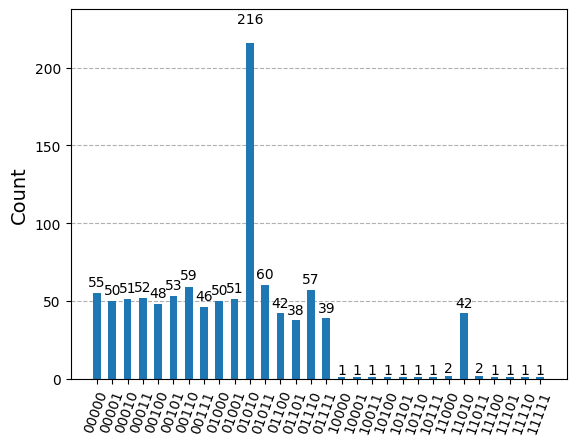

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator
from qiskit.circuit.library import MCXGate

# Define a simplified oracle for Grover's search (AES-like, 4-bit key)
def simplified_aes_oracle(qc, key_qubits, oracle_qubit):
    # Implement a toy "encryption" function as an oracle
    # For a 4-bit example, assume we want to find the key "1010"
    # The oracle marks this state
    qc.x(key_qubits[0])
    qc.x(key_qubits[2])
    qc.mcx(list(key_qubits), oracle_qubit)
    qc.x(key_qubits[0])
    qc.x(key_qubits[2])

# Set up the key and oracle qubits
key_size = 4  # Simplified 4-bit key example

# Create the quantum circuit
qc = QuantumCircuit(key_size + 1)  # Key qubits + Oracle qubit

# Initialize key qubits to a superposition state
qc.h(range(key_size))

# Apply the simplified AES-like oracle
simplified_aes_oracle(qc, range(key_size), key_size)

# Apply Grover's diffusion operator
qc.h(range(key_size))
qc.x(range(key_size))
qc.h(key_size - 1)
qc.mcx(list(range(key_size - 1)), key_size - 1)
qc.h(key_size - 1)
qc.x(range(key_size))
qc.h(range(key_size))

# Add measurement
qc.measure_all()

# Transpile and run the circuit on a simulator
simulator = AerSimulator()
qc_transpiled = transpile(qc, simulator, optimization_level=3)
result = simulator.run(qc_transpiled, shots=1024).result()

# Show the results
counts = result.get_counts()
plot_histogram(counts)


C:\Users\muham\AppData\Local\Temp\ipykernel_26484\2748981864.py:50: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(backend=backend)


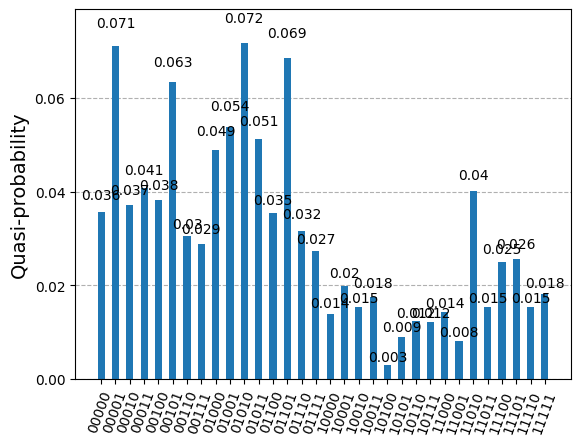

In [11]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.visualization import plot_histogram

# Define a simplified oracle for Grover's search (AES-like, 4-bit key)
def simplified_aes_oracle(qc, key_qubits, oracle_qubit):
    # Implement a toy "encryption" function as an oracle
    # For a 4-bit example, assume we want to find the key "1010"
    # The oracle marks this state
    qc.x(key_qubits[0])
    qc.x(key_qubits[2])
    qc.mcx(list(key_qubits), oracle_qubit)
    qc.x(key_qubits[0])
    qc.x(key_qubits[2])

# Set up the key and oracle qubits
key_size = 4  # Simplified 4-bit key example

# Create the quantum circuit
qc = QuantumCircuit(key_size + 1)  # Key qubits + Oracle qubit

# Initialize key qubits to a superposition state
qc.h(range(key_size))

# Apply the simplified AES-like oracle
simplified_aes_oracle(qc, range(key_size), key_size)

# Apply Grover's diffusion operator
qc.h(range(key_size))
qc.x(range(key_size))
qc.h(key_size - 1)
qc.mcx(list(range(key_size - 1)), key_size - 1)
qc.h(key_size - 1)
qc.x(range(key_size))
qc.h(range(key_size))

# Add measurement
qc.measure_all()

# Transpile the circuit for a specific backend
service = QiskitRuntimeService()

# Choose your backend, e.g., 'ibmq_lima', 'ibmq_qasm_simulator'
backend = service.backend('ibm_kyoto')  # or any other hardware backend

# Transpile for the chosen backend
qc_transpiled = transpile(qc, backend, optimization_level=3)

# Use the Sampler primitive to run the circuit
sampler = Sampler(backend=backend)
job = sampler.run(circuits=qc_transpiled, shots=1024)
result = job.result()

# Get the counts and plot the histogram
counts = result.quasi_dists[0].binary_probabilities()
plot_histogram(counts)


## The bitstrings 0101, 0110, and 1010 have relatively high quasi-probabilities (around 0.071, 0.072, and 0.069, respectively). These are likely candidates for the solution based on the Grover's search.